# K Nearest Neighbours

In KNN, K is the number of nearest neighbours. The number of neighbours is the core deciding factor. K is generally an odd number if the number of classes is 2. When K=1, then the algorithm is known as the nearest neighbour algorithm. This is the simplest case. Suppose P1 is the point, for which label needs to predict. First, we find the one closest point to P1 and then the label of the nearest point is assigned to P1.

For finding the closest similar points, we find the distance between points using the distance measures such as Euclidean distance, Hamming distance, Manhattan distance and Minkowski distance.

# Curse of Dimensionality

To deak with the problem of the curse of dimensionality, we need to perform principal component analysis before applying any machine learning algorithm, or we can also use feature selection approach. Research has shown that in large dimension Euclidean distance is not useful anymore. Therefore, we can prefer other measures such as cosine similarity, which get decidedly less affected by high dimensions.

<img src="https://www.visiondummy.com/wp-content/uploads/2014/04/dimensionality_vs_performance.png"></img>

# How to decide the number of neighbours in KNN?

The number og neighbors(K) in KNN is a hyperparamter that we need to choose at the time og model building.

Research has shown that no optimal number of neighbours suits all king of data sets. Each data set has its own requirements. In the case of a small number of neighbours, the noise will have a higher influence on the result, and a large number of neighbours makes it computationally expensive. Research has also shown that a small amount of neighbours are most flexible fit which will have low bias but high variance and a large number of neighbours will have a smooth decision boundary which means a lower variance but a higher bias.

In [ ]:
!pip install -U scikit-learn

     |████████████████████████████████| 22.3MB 1.5MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
from sklearn import datasets

In [ ]:
wine=datasets.load_wine()

In [ ]:
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [ ]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [ ]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [ ]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [ ]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [ ]:
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

In [ ]:
X=wine.data
y=wine.target

In [ ]:
X.shape, y.shape

((178, 13), (178,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [ ]:
neighbors=3

knn=KNeighborsClassifier(n_neighbors=neighbors)
knn.fit(X_train, y_train)
y_predict=knn.predict(X_test)

print('Accuracy: ', metrics.accuracy_score(y_test, y_predict))

Accuracy:  0.75


In [ ]:
neighbors=5

knn=KNeighborsClassifier(n_neighbors=neighbors)
knn.fit(X_train, y_train)
y_predict=knn.predict(X_test)

print('Accuracy: ', metrics.accuracy_score(y_test, y_predict))

Accuracy:  0.8055555555555556


In [ ]:
neighbors=7

knn=KNeighborsClassifier(n_neighbors=neighbors)
knn.fit(X_train, y_train)
y_predict=knn.predict(X_test)

print('Accuracy: ', metrics.accuracy_score(y_test, y_predict))

Accuracy:  0.7222222222222222


# Data Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

neighbors=5

knn=KNeighborsClassifier(n_neighbors=neighbors)
knn.fit(X_train, y_train)
y_predict=knn.predict(X_test)

print('Accuracy: ', metrics.accuracy_score(y_test, y_predict))

Accuracy:  0.9722222222222222


# Parameter Tunig with Cross Validation for performance

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
neighbors = list(range(1,50,2))
cv_scores=[]

for k in neighbors:
  knn=KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn, X_scaled, y, cv=10, scoring='accuracy')
  cv_scores.append(scores.mean())

In [ ]:
cv_scores

[0.9434640522875817,
 0.9545751633986927,
 0.9604575163398692,
 0.9663398692810456,
 0.9718954248366012,
 0.9718954248366012,
 0.9663398692810456,
 0.9663398692810456,
 0.9722222222222221,
 0.9722222222222221,
 0.9722222222222221,
 0.9833333333333334,
 0.9718954248366012,
 0.9718954248366012,
 0.9660130718954247,
 0.9660130718954247,
 0.9777777777777779,
 0.9777777777777779,
 0.9722222222222221,
 0.9722222222222221,
 0.9663398692810456,
 0.9663398692810456,
 0.9604575163398692,
 0.9604575163398692,
 0.9604575163398692]

In [ ]:
MSE = [1-x for x in cv_scores]
MSE

[0.05653594771241832,
 0.04542483660130725,
 0.0395424836601308,
 0.03366013071895435,
 0.028104575163398815,
 0.028104575163398815,
 0.03366013071895435,
 0.03366013071895435,
 0.0277777777777779,
 0.0277777777777779,
 0.0277777777777779,
 0.016666666666666607,
 0.028104575163398815,
 0.028104575163398815,
 0.033986928104575265,
 0.033986928104575265,
 0.022222222222222143,
 0.022222222222222143,
 0.0277777777777779,
 0.0277777777777779,
 0.03366013071895435,
 0.03366013071895435,
 0.0395424836601308,
 0.0395424836601308,
 0.0395424836601308]

In [ ]:
optimal_k=neighbors[MSE.index(min(MSE))]
optimal_k

23

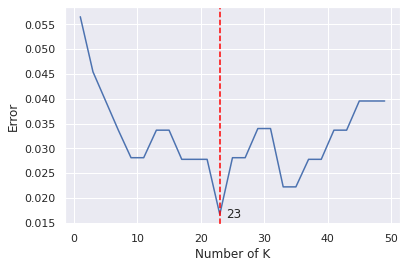

In [ ]:
plt.plot(neighbors, MSE)
plt.xlabel('Number of K')
plt.ylabel('Error')

plt.axvline(x=optimal_k, color='red', ls='--')
plt.text(optimal_k+1, 0.016, optimal_k, rotation=360)

plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

neighbors=23

knn=KNeighborsClassifier(n_neighbors=neighbors)
knn.fit(X_train, y_train)
y_predict=knn.predict(X_test)

print('Accuracy: ', metrics.accuracy_score(y_test, y_predict))

Accuracy:  0.9814814814814815
